29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.4481 - val_loss: 0.3138
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.3078 - val_loss: 0.3008
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2973 - val_loss: 0.2955
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2920 - val_loss: 0.2918
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2894 - val_loss: 0.2893
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2867 - val_loss: 0.2876
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2849 - val_loss: 0.2867
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.2840 - val_loss: 0.2858
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2820 - val_loss: 0.2838
Epoch 10/15
235/235 ━━━━━━━━━

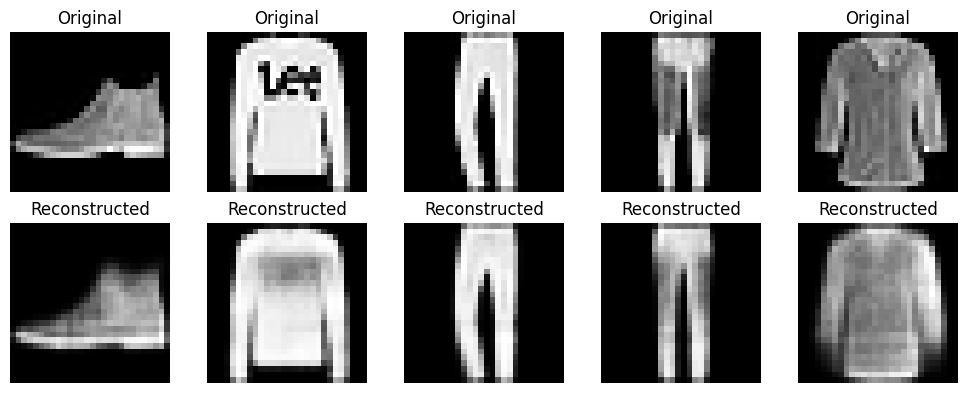

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.4719 - val_loss: 0.3339
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.3276 - val_loss: 0.3219
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.3180 - val_loss: 0.3159
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3121 - val_loss: 0.3123
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3082 - val_loss: 0.3097
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3058 - val_loss: 0.3077
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3040 - val_loss: 0.3063
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.3037 - val_loss: 0.3064
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3018 - val_loss: 0.3043
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3011 - val_loss: 0.3032
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.2997 - val_loss: 0.3027
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 

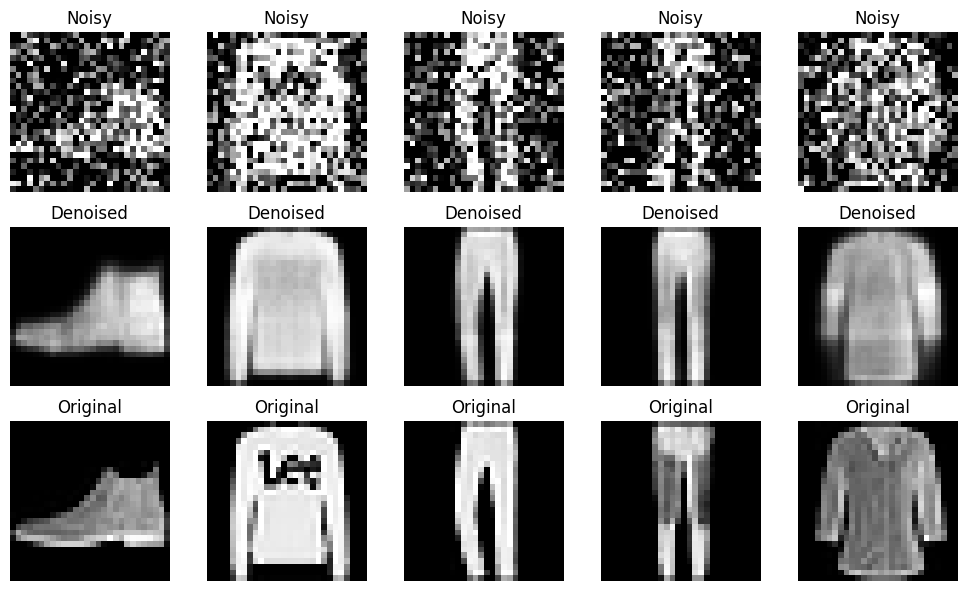

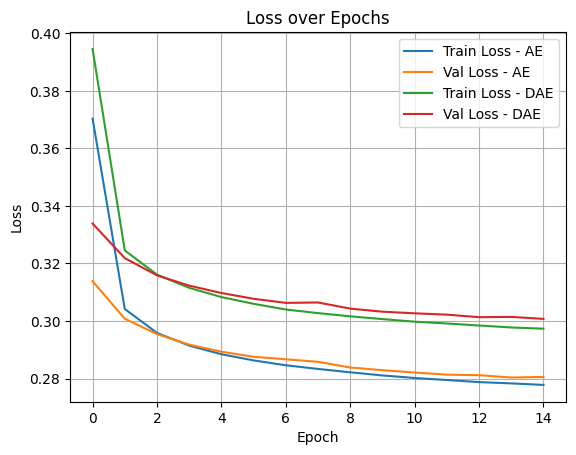

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# === Load data ===
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# === 1. Autoencoder with extra hidden layers ===
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)  # bottleneck

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# === Train autoencoder ===
history = autoencoder.fit(x_train, x_train,
                          epochs=15,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# === 2. Predict & visualize ===
decoded_imgs = autoencoder.predict(x_test)

n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.tight_layout()
plt.show()

# === 3. Denoising Autoencoder ===

# Add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Create same architecture for denoising autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

denoise_autoencoder = Model(input_img, decoded)
denoise_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train denoising autoencoder
denoise_history = denoise_autoencoder.fit(x_train_noisy, x_train,
                                          epochs=15,
                                          batch_size=256,
                                          shuffle=True,
                                          validation_data=(x_test_noisy, x_test))

# Predict and visualize denoising output
denoised_imgs = denoise_autoencoder.predict(x_test_noisy)

plt.figure(figsize=(10, 6))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Ground truth
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.tight_layout()
plt.show()

# === 4. Plot training/validation loss ===
plt.plot(history.history['loss'], label='Train Loss - AE')
plt.plot(history.history['val_loss'], label='Val Loss - AE')
plt.plot(denoise_history.history['loss'], label='Train Loss - DAE')
plt.plot(denoise_history.history['val_loss'], label='Val Loss - DAE')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Video presentation link:https://drive.google.com/file/d/1OmOJQLiMaBG7ujRWbXzSZLCl6webni1/view?usp=drive_link